In [ ]:
!git clone --depth 1 https://github.com/Unity-Technologies/ml-agents.git

Cloning into 'ml-agents'...
remote: Enumerating objects: 2351, done.
remote: Counting objects: 100% (2351/2351), done.
remote: Compressing objects: 100% (1885/1885), done.
remote: Total 2351 (delta 889), reused 1287 (delta 448), pack-reused 0
Receiving objects: 100% (2351/2351), 97.66 MiB | 4.01 MiB/s, done.
Resolving deltas: 100% (889/889), done.
Updating files: 100% (2181/2181), done.


In [5]:
# %%capture
# Go inside the repository and install the package
%cd ./ml-agents
!pip3 install -e ./ml-agents-envs
!pip3 install -e ./ml-agents

/content/drive/MyDrive/ml-agents
Obtaining file:///content/drive/MyDrive/ml-agents/ml-agents-envs
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.7/756.7 kB 64.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pettingzoo: filename=PettingZoo-1.15.0-py3-none-any.whl size=875631 sha256=9fb5685d24c775a49dfa85073fc91b6c597d88900cba77f184f807b4c635b1fa
  Stored in directory: /root/.cache/pip/wheels/e3/35/ac/76984cb1c12902d190c818d57c43d25c3f9281591a640ccd13
Successfully built pettingzoo
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.59.2
    Uninstalling grpcio-1.59.2:
      Suc

Obtaining file:///content/drive/MyDrive/ml-agents/ml-agents
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 44.7 MB/s eta 0:00:00
  Running setup.py develop for mlagents


In [ ]:
%cd ..

In [7]:
!chmod -R 755 ./PushBlockCollabLinux

In [8]:
# path/yaml_writer.py
import yaml

def write_to_yaml(data, file_path):
    with open(file_path, 'w') as file:
        yaml.dump(data, file, default_flow_style=False)


Train Model Using MA-POCA

In [9]:
MAPOCA_hyperparameters = {
        "behaviors": {
            "PushBlockCollab": {
                "trainer_type": "poca",
                "hyperparameters": {
                    "batch_size": 1024,
                    "buffer_size": 10240,
                    "learning_rate": 0.0003,
                    "beta": 0.01,
                    "epsilon": 0.2,
                    "lambd": 0.95,
                    "num_epoch": 3,
                    "learning_rate_schedule": "constant"
                },
                "network_settings": {
                    "normalize": False,
                    "hidden_units": 256,
                    "num_layers": 2,
                    "vis_encode_type": "simple"
                },
                "reward_signals": {
                    "extrinsic": {
                        "gamma": 0.99,
                        "strength": 1.0
                    }
                },
                "keep_checkpoints": 5,
                "max_steps": 15000000,
                "time_horizon": 64,
                "summary_freq": 60000
            }
        }
    }
write_to_yaml(MAPOCA_hyperparameters, "./MA-POCA.yaml")

In [12]:
!mlagents-learn "./MA-POCA.yaml" --env="./PushBlockCollabLinux/PushBlockCollab.x86_64" --run-id="PushBlockCollab_POCA" --results-dir="./results" --no-graphics --resume

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)
2023-11-29 20:55:19.403903: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 20:55:19.403964: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 20:55:19.404002: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 20:55:19.411566: I ten

Train Model Using MA-POCA+RND

In [13]:
MAPOCA_RND_hyperparameters = {
        "behaviors": {
            "PushBlockCollab": {
                "trainer_type": "poca",
                "hyperparameters": {
                    "batch_size": 1024,
                    "buffer_size": 10240,
                    "learning_rate": 0.0003,
                    "beta": 0.01,
                    "epsilon": 0.2,
                    "lambd": 0.95,
                    "num_epoch": 3,
                    "learning_rate_schedule": "constant"
                },
                "network_settings": {
                    "normalize": False,
                    "hidden_units": 256,
                    "num_layers": 2,
                    "vis_encode_type": "simple"
                },
                "reward_signals": {
                    "extrinsic": {
                        "gamma": 0.99,
                        "strength": 1.0
                    },
                    "rnd": {
                        "gamma": 0.99,
                        "strength": 0.01,
                        "network_settings": {
                            "hidden_units": 64,
                            "num_layers": 3
                        },
                        "learning_rate": 0.0001
                    }
                },
                "keep_checkpoints": 5,
                "max_steps": 15000000,
                "time_horizon": 64,
                "summary_freq": 60000
            }
        }
    }
write_to_yaml(MAPOCA_RND_hyperparameters,'./MA-POCA+RND.yaml')

In [14]:
!mlagents-learn "./MA-POCA+RND.yaml" --env="./PushBlockCollabLinux/PushBlockCollab.x86_64" --run-id="PushBlockCollab_POCA_RND" --results-dir="./results" --no-graphics --resume

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)
2023-11-29 20:57:33.686269: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 20:57:33.686327: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 20:57:33.686371: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 20:57:33.696001: I ten

Train Model Using PPO

In [15]:
PPO_hyperparameters = {
        "behaviors": {
            "PushBlockCollab": {
                "trainer_type": "ppo",
                "hyperparameters": {
                    "batch_size": 1024,
                    "buffer_size": 10240,
                    "learning_rate": 0.0003,
                    "beta": 0.01,
                    "epsilon": 0.2,
                    "lambd": 0.95,
                    "num_epoch": 3,
                    "learning_rate_schedule": "constant"
                },
                "network_settings": {
                    "normalize": False,
                    "hidden_units": 256,
                    "num_layers": 2,
                    "vis_encode_type": "simple"
                },
                "reward_signals": {
                    "extrinsic": {
                        "gamma": 0.99,
                        "strength": 1.0
                    }
                },
                "keep_checkpoints": 5,
                "max_steps": 15000000,
                "time_horizon": 64,
                "summary_freq": 60000
            }
        }
    }
write_to_yaml(PPO_hyperparameters, "./PPO.yaml")

In [16]:
!mlagents-learn "./PPO.yaml" --env="./PushBlockCollabLinux/PushBlockCollab.x86_64" --run-id="PushBlockCollab_PPO" --results-dir="./results" --no-graphics --resume

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)
2023-11-29 20:58:13.687630: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 20:58:13.687700: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 20:58:13.687742: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 20:58:13.701247: I ten

Visualize Results

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

def extract_results(result_directory):
    """
    Extract results from event files in the given directory.
    :param result_directory: The directory containing event files.
    :return: A dictionary containing data from all models.
    """
    data = {}
    for model_dir in os.listdir(result_directory):
        model_path = os.path.join(result_directory, model_dir)
        if os.path.isdir(model_path):
            model_data = []
            for root, _, files in os.walk(model_path):
                for file in files:
                    if 'events.out.tfevents' in file:
                        event_path = os.path.join(root, file)
                        ea = event_accumulator.EventAccumulator(event_path)
                        ea.Reload()
                        for tag in ea.Tags()['scalars']:
                            scalars = ea.Scalars(tag)
                            df = pd.DataFrame([[s.wall_time, s.step, s.value] for s in scalars], columns=['Wall Time', 'Step', 'Value'])
                            df['Tag'] = tag
                            model_data.append(df)
            if model_data:
                data[model_dir] = pd.concat(model_data, ignore_index=True)
    return data


def smooth(values, weight=0.6):
    """
    Apply exponential smoothing to a list of values. It helps to
    visualize plots better.
    :param values: A list or pandas Series of values to smooth.
    :param weight: The smoothing coefficient (between 0 and 1).
    :return: A list of smoothed values.
    """
    last = values.iloc[0] if isinstance(values, pd.Series) else values[0]
    smoothed = [last]  # List to collect smoothed values
    for point in values.iloc[1:] if isinstance(values, pd.Series) else values[1:]:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

def preprocess_data(model_data, tag):
    """
    Preprocess the data by averaging values for each step.
    We should use this function to average values for steps
    that have multiple values due too using --resume while training.
    :param model_data: DataFrame containing the model's data.
    :param tag: The tag of the scalar to plot.
    :return: Processed DataFrame.
    """
    # Filter data by tag
    tag_data = model_data[model_data['Tag'] == tag]

    # Group by 'Step' and calculate the mean
    return tag_data.groupby('Step').mean(numeric_only=True).reset_index()

def plot_scalar_all_models(data, tag, value_label):
    """
    Plot a scalar value for a specific tag across all models.
    :param data: The extracted data dictionary.
    :param tag: The tag of the scalar to plot.
    """
    plt.figure(figsize=(10, 6))

    for model_name, model_data in data.items():
        processed_data = preprocess_data(model_data, tag)
        # tag_data = model_data[model_data['Tag'] == tag]

        if not processed_data.empty:
            smoothed_values = smooth(processed_data['Value'], 0.7)

            plt.plot(processed_data['Step']/1e6, smoothed_values, label='_'.join(model_name.split('_')[1:]))

    plt.xlabel('Steps(1 Million)')
    plt.ylabel(value_label)
    # plt.ticklabel_format(axis='x',style='plain')
    plt.legend()


    plt.show()

In [2]:
results = extract_results('./results')

2023-12-03 19:58:09.882150: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


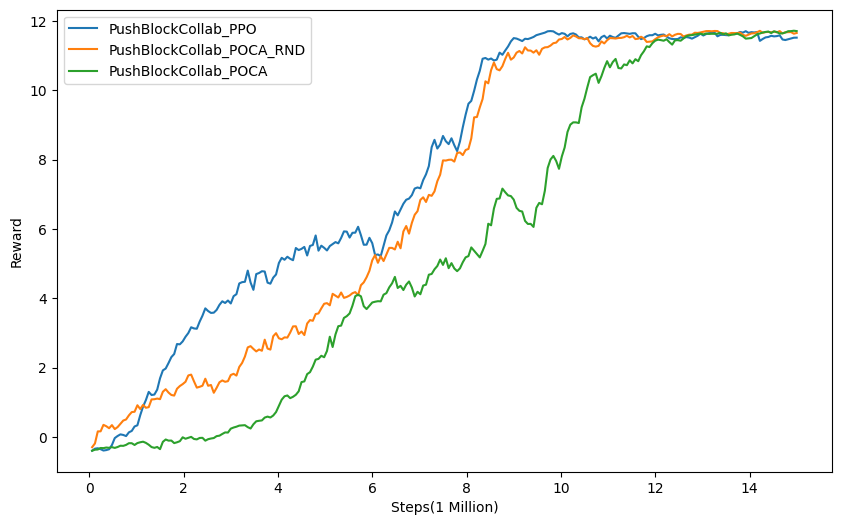

In [3]:
plot_scalar_all_models(results, 'Policy/Extrinsic Reward', 'Reward')

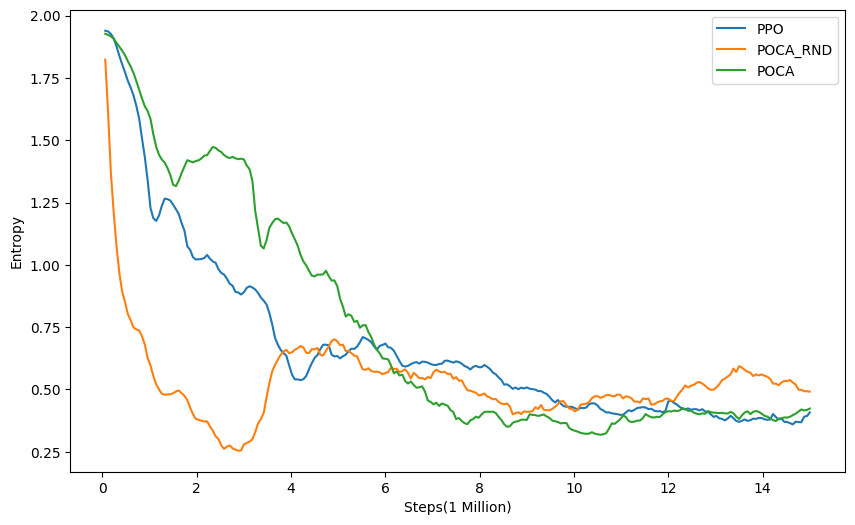

In [13]:
plot_scalar_all_models(results, 'Policy/Entropy', 'Entropy')

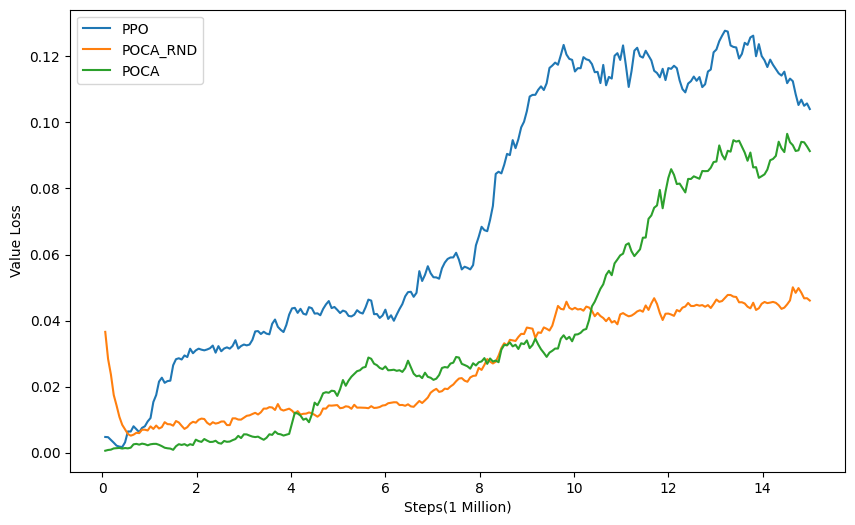

In [14]:
plot_scalar_all_models(results, 'Losses/Value Loss', 'Value Loss')